<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

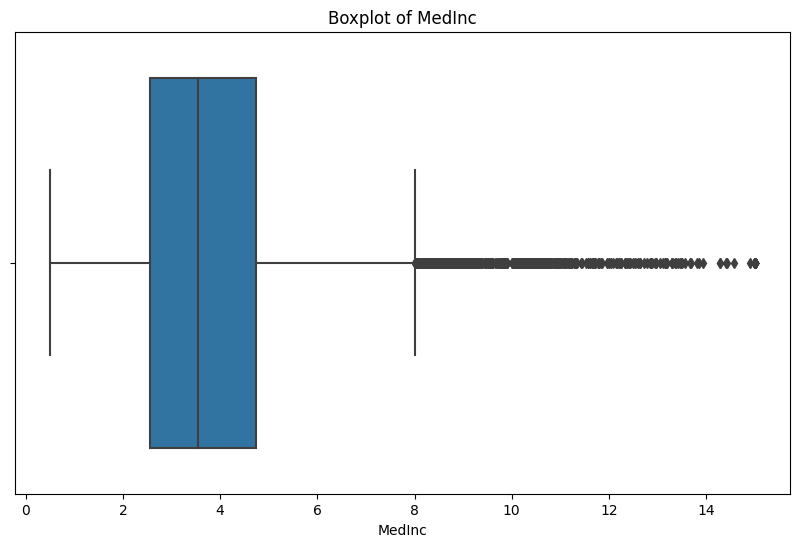

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the California Housing dataset
california_housing = fetch_california_housing()

# Convert to a DataFrame for easier manipulation
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target  # Adding target column

# Display basic info about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check for outliers (you can use boxplots or statistical methods)
# For instance, you can use boxplots to visualize outliers in specific columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='MedInc', data=data)  # Example: 'MedInc' column
plt.title('Boxplot of MedInc')
plt.show()


In [2]:
# Splitting the dataset into features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Splitting the dataset into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (16512, 8), y_train shape: (16512,)
X_test shape: (4128, 8), y_test shape: (4128,)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Mean Squared Error (MSE): 0.5558915986952444
R-squared (R2 Score): 0.5757877060324508


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# Scale the features (optional but often recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Optional dropout layer to prevent overfitting
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the testing set
y_pred_ann = model.predict(X_test_scaled)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN Mean Squared Error (MSE): {mse_ann}")
print(f"ANN R-squared (R2 Score): {r2_ann}")


Epoch 1/50
413/413 [==============================] - 6s 5ms/step - loss: 1.1314 - val_loss: 0.5684
Epoch 2/50
413/413 [==============================] - 2s 4ms/step - loss: 0.5032 - val_loss: 0.4671
Epoch 3/50
413/413 [==============================] - 1s 2ms/step - loss: 0.4640 - val_loss: 0.4127
Epoch 4/50
413/413 [==============================] - 1s 2ms/step - loss: 0.4492 - val_loss: 0.4076
Epoch 5/50
413/413 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3896
Epoch 6/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3798 - val_loss: 0.3709
Epoch 7/50
413/413 [==============================] - 1s 3ms/step - loss: 0.3732 - val_loss: 0.3746
Epoch 8/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3643 - val_loss: 0.3578
Epoch 9/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3612 - val_loss: 0.3739
Epoch 10/50
413/413 [==============================] - 2s 4ms/step - loss: 0.3538 - val_loss: 0.3573

**Comparison between Linear Regression VS Artificial Neural Network**

Advantages and Drawbacks:

**Linear Regression**

**Strengths:**

Easy to understand and straightforward.
quick training with sizable datasets.
gives information on the significance of a feature.

**Drawbacks:**

Its inability to capture intricate patterns stems from its assumption of linear relationships.
sensitive to noise and anomalies.
Perhaps not very effective with non-linear data.

** Artificial Neural Network (ANN):**

**Advantages:**

Capability to represent intricate non-linear relationships.
able to understand complex representations from data.
manages big, multidimensional datasets with ease.

**Drawbacks:**

More data is needed for tuning and training.
prone to overfitting if not properly regularised, particularly on smaller datasets.
less understandable than models that are linear.



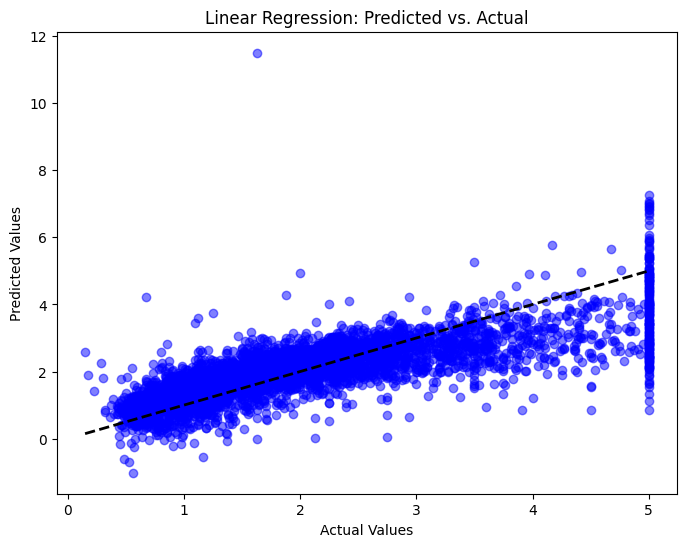

In [5]:
'''Visualizing Predicted vs. Actual Values:'''
#Linear Regression Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Linear Regression: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


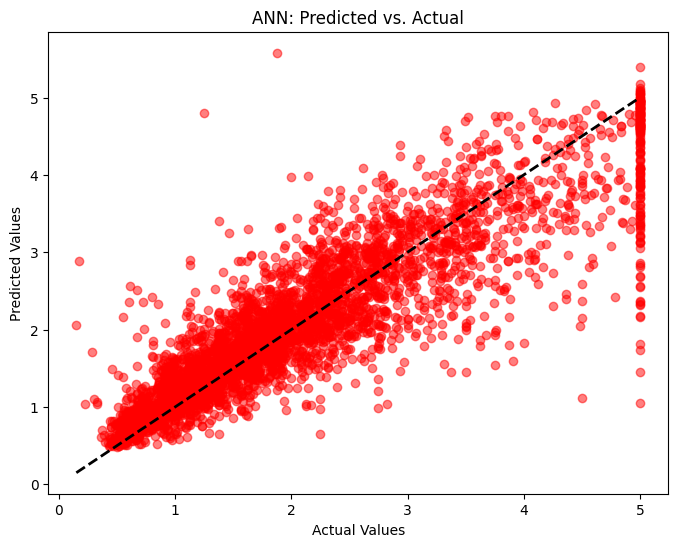

In [6]:
#Artificial Neural Netwrok Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, color='red', alpha=0.5)
plt.title('ANN: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


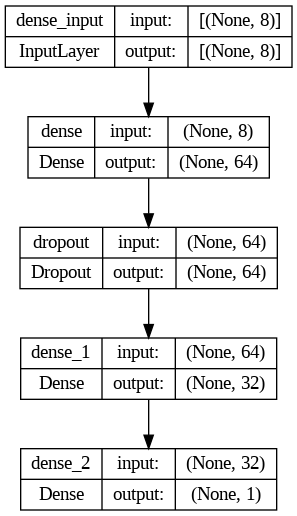

In [7]:
#Visualising Architecture Model
from tensorflow.keras.utils import plot_model

# Assuming 'model' is the defined ANN model
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)


In [8]:
from PIL import Image

img = Image.open('ann_model.png')
img.show()  # Displays the image using the default image viewer


**Important conclusions: Performance comparison**

**MSE in Linear Regression:** 0.5558915986952444

**R2 Score:** 0.5757877060324508

**MSE in Artificial Neutral Network:** 0.2819474647019028

**R2 Score:** 0.784840100011837

**Comparison of the Actual and Predicted Values:**

**Advantages and Drawbacks:**

**Linear Regression**

Simple and easy to understand
possibly have trouble with intricate non-linear relationships.

***Artificial Neural Network:***

Able to recognise intricate patterns.
more data is needed, and it is prone to overfitting.

**Performance Assessment: Predicated on the metrics and visualisations of the evaluation:**

If there had been less complexity or a majority of linear relationships in the California Housing dataset, linear regression might have done fairly well.
Given the non-linear and complex nature of the relationships, as suggested by the lower MSE and higher R2 Score, ANN may have performed better.

***Insights into Model Performance: ***

The ANN outperformed Linear Regression in predicting house prices using the California Housing dataset, most likely due to its capacity to capture intricate patterns and non-linear relationships.